# Image (.hdr, .mhd, etc...) manipulation for GATE

## Contents:
* Reading images with NumPy
* Reading images with SimpleITK
* Converting Dicom image serie to MetaImages (.mhd/.raw)
* Merging images

# Reading images

## Reading any binary image
PET mouse data from https://neuroimage.usc.edu/neuro/Digimouse_Download in Analyze (.hdr / .img) format.

In [1]:
import numpy as np
import ipywidgets as ipw
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import seaborn as sns
import numpy.ma as ma
import SimpleITK as sitk
import pydicom as dcm
import glob
# %matplotlib inline


In [2]:
file = 'data/mouse_PET.img'
data_type = np.float32
dimension = [128, 128, 129]

# read the binary file
image = np.fromfile(file, dtype=data_type)
image = image.reshape(dimension,order='F')

print('image.min() =', image.min())
print('image.max() =', image.max())
print('image.shape :', image.shape)

image.min() = 0.0
image.max() = 14335.713
image.shape : (128, 128, 129)


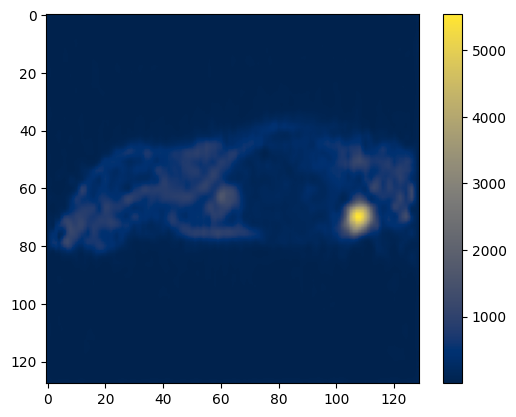

In [3]:
# cmap = sns.color_palette("mako_r", as_cmap=True)
# cmap = 'bone_r'
cmap = 'cividis'
# cmap = sns.color_palette("icefire", as_cmap=True)
# cmap = sns.color_palette("coolwarm", as_cmap=True)

plt.figure()
plt.imshow(ma.masked_less_equal(image[63,:,:], 0), cmap=cmap)
# plt.imshow(ma.masked_less_equal(image[63,:,:], 0), cmap=cmap, norm=mplc.LogNorm(1, vmax=image.max()))
# plt.imshow(image[63,:,:], cmap=plt.cm.jet)
plt.colorbar()
plt.show()

In [4]:
def plot_image(myslice):
    plt.figure()
    plt.imshow(image[myslice,:,:], cmap=cmap, vmin=image.min(), vmax=image.max())
    plt.colorbar()
    plt.show()
    return;

ipw.interact(plot_image, myslice=(0, image.shape[0]-1));

interactive(children=(IntSlider(value=63, description='myslice', max=127), Output()), _dom_classes=('widget-in…

In [5]:
# save the binary image
image.tofile('output/mouse_PET_modified.img')

## Reading Meta images (.mhd / .raw)
Easy image reading with the library SimpleITK

In [6]:
# 1) Read the image
itkimage = sitk.ReadImage('data/patient_CT.mhd')
image = sitk.GetArrayFromImage(itkimage)

print ('itkimage.GetSize() :' , itkimage.GetSize())
print ('itkimage.GetSpacing() :' , itkimage.GetSpacing())

print('image.sum() =', image.sum())
print('image.min() =', image.min())
print('image.max() =', image.max())
print('image.shape :', image.shape)

itkimage.GetSize() : (110, 110, 220)
itkimage.GetSpacing() : (4.42, 4.42, 4.42)
image.sum() = -2034006156
image.min() = -1024
image.max() = 3052
image.shape : (220, 110, 110)


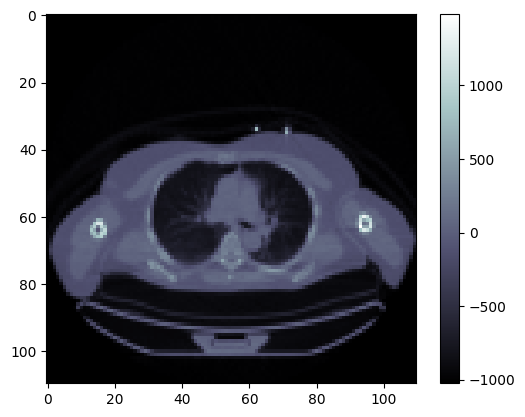

In [7]:
plt.figure()
plt.imshow(image[140,:,:], cmap='bone')
plt.colorbar()
plt.show()

In [8]:
def plot_image(tran, coro, sagi):
    mini = image.min()
    maxi = image.max()
    cmap = 'bone'
    
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(image[tran, :, :], origin='lower', cmap=cmap, vmin=mini, vmax=maxi)
    plt.colorbar()
    
    plt.subplot(1, 3, 2)
    plt.imshow(image[:, coro, :], origin='lower', cmap=cmap, vmin=mini, vmax=maxi)
    plt.colorbar()
    
    plt.subplot(1, 3, 3)
    plt.imshow(image[:, :, sagi], origin='lower', cmap=cmap, vmin=mini, vmax=maxi)
    plt.colorbar()
    plt.show()
    return;

ipw.interact(plot_image, tran=(0, image.shape[0]-1), coro=(0, image.shape[1]-1), sagi=(0, image.shape[2]-1));

interactive(children=(IntSlider(value=109, description='tran', max=219), IntSlider(value=54, description='coro…

In [9]:
# save the image
output = sitk.GetImageFromArray(image)
sitk.WriteImage(output,'output/patient_CT.mhd')

## Exercise
* modify the image data so that the slices of the CT (220) correspond to the last dimension
* crop the image in the sagittal plane to 25:85
* save the modified image

In [10]:
imm = np.transpose(image, (1, 2, 0))
print(imm.shape)
imm = imm[25:85, :, :]
def plot_image(myslice):
    plt.figure()
    plt.imshow(np.rot90(imm[:, myslice, :]), cmap='bone', vmin=image.min(), vmax=image.max())
    plt.colorbar()
    plt.show()
    return;


ipw.interact(plot_image, myslice=(0, imm.shape[1]-1));

(110, 110, 220)


interactive(children=(IntSlider(value=54, description='myslice', max=109), Output()), _dom_classes=('widget-in…

In [11]:
# complete here ...

## Reading Dicom images (.dcm)
Easy image reading with the library SimpleITK

In [12]:
# 1) Read the image
itkimage = sitk.ReadImage('data/patient_SPECT.dcm')
image = sitk.GetArrayFromImage(itkimage)

print ('itkimage.GetSpacing() :' , itkimage.GetSpacing())
print('image.sum() =', image.sum())
print('image.min() =', image.min())
print('image.max() =', image.max())
print('image.shape :', image.shape)

itkimage.GetSpacing() : (4.7951998710632, 4.7951998710632, 1.0)
image.sum() = 18169297
image.min() = 0
image.max() = 689
image.shape : (320, 128, 128)


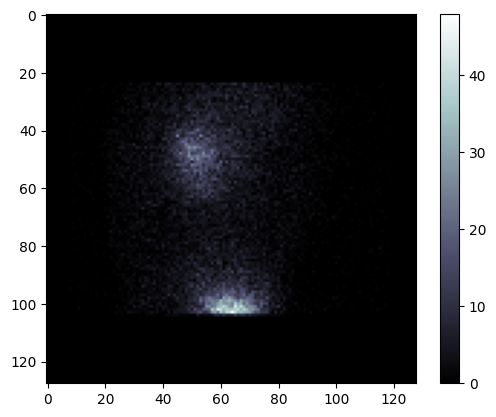

In [13]:
plt.figure()
plt.imshow(image[140, :, :], cmap='bone')
plt.colorbar()
plt.show()

## Reading Dicom images (.dcm)
Easy image reading with the library PyDicom

In [14]:
# open dicom file (works for all .dcm file)
File = dcm.read_file('data/patient_SPECT.dcm')
# Acces to image pixel data 
image = File.pixel_array

print(type(image))
print('Pixel spacing :', File.PixelSpacing)
print('image.sum() =', image.sum())
print('image.min() =', image.min())
print('image.max() =', image.max())
print('image.shape :', image.shape)

<class 'numpy.ndarray'>
Pixel spacing : [4.7951998710632, 4.7951998710632]
image.sum() = 18169297
image.min() = 0
image.max() = 689
image.shape : (320, 128, 128)


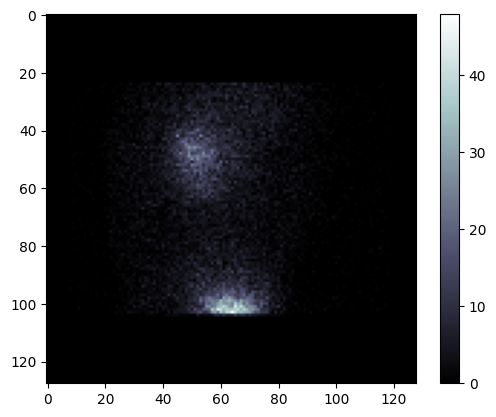

In [15]:
plt.figure()
plt.imshow(image[140, :, :], cmap='bone')
plt.colorbar()
plt.show()

# Converting DICOM to MetaImage (.mhd/.raw)

In [16]:
input_dir = 'convert/dicom/'
output_dir = 'convert/mhd/'

series_IDs = sitk.ImageSeriesReader_GetGDCMSeriesIDs(input_dir)

if not series_IDs:
    print('No series in directory ' + input_dir)

for series in series_IDs:
    filename = series.split('.')[-1]
    sitk.WriteImage(sitk.ReadImage(sitk.ImageSeriesReader_GetGDCMSeriesFileNames(input_dir, series)),
                    output_dir+filename+'.mhd')
    print('Dicom serie converted to:', output_dir+filename+'.mhd')

Dicom serie converted to: convert/mhd/07877442.mhd


## Exercise
* place a copy of the data/patient_CT_dcm/*.dcm images in the folder convert/dicom/  
* convert the Dicom images serie to a single .mhd image using the cell above
* read the converted image and display an axial slice of it

In [17]:
itkimage = sitk.ReadImage(output_dir+filename+'.mhd')
image = sitk.GetArrayFromImage(itkimage)

print ('itkimage.GetSize() :' , itkimage.GetSize())
print ('itkimage.GetSpacing() :' , itkimage.GetSpacing())

print('image.sum() =', image.sum())
print('image.min() =', image.min())
print('image.max() =', image.max())
print('image.shape :', image.shape)

itkimage.GetSize() : (512, 512, 26)
itkimage.GetSpacing() : (0.58984375, 0.58984375, 0.5)
image.sum() = -3205706695
image.min() = -1000
image.max() = 1305
image.shape : (26, 512, 512)


In [18]:
def plot_image(tran, coro, sagi):
    mini = image.min()
    maxi = image.max()
    cmap = 'bone'
    
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(image[tran, :, :], origin='lower', cmap=cmap, vmin=mini, vmax=maxi)
    plt.colorbar(location='bottom')
    
    plt.subplot(1, 3, 2)
    plt.imshow(image[:, coro, :], origin='lower', cmap=cmap, vmin=mini, vmax=maxi)
    plt.colorbar(location='bottom')
    
    plt.subplot(1, 3, 3)
    plt.imshow(image[:, :, sagi], origin='lower', cmap=cmap, vmin=mini, vmax=maxi)
    plt.colorbar(location='bottom')
    plt.show()
    return;

ipw.interact(plot_image, tran=(0, image.shape[0]-1), coro=(0, image.shape[1]-1), sagi=(0, image.shape[2]-1));

interactive(children=(IntSlider(value=12, description='tran', max=25), IntSlider(value=255, description='coro'…

In [19]:
# complete here ...

# Merging images

## Merge GATE output DoseActor .mhd of splitted simulations

In [20]:


# directory of your simulation splitted outputs
output_dir = 'output/'

# loop over the .mhd outputs
first_image = True
for file in glob.glob(output_dir+'*Dose.mhd'):
#    if '_merged' not in file:
        print ('Reading file:',file)
        # 1) Read the image
        itkimage = sitk.ReadImage(file)
        # 2) Sum the image values
        if first_image:
            image_merged = sitk.GetArrayFromImage(itkimage)
            first_image = False
        else: 
            image_merged += sitk.GetArrayFromImage(itkimage)
        #print ('Sum of all voxels:',image_merged.max())

# 3) Write the sum of all images
itkimage_merged = sitk.GetImageFromArray(image_merged)
itkimage_merged.CopyInformation(itkimage)
sitk.WriteImage(itkimage_merged, output_dir+'output-Dose_merged.mhd')

print ('Merged file created:', output_dir+'output-Dose_merged.mhd')
print ('Dimension : ' , itkimage_merged.GetSize())
print ('Pixels Size :' , itkimage_merged.GetSpacing())

Reading file: output/3d_6-Dose.mhd
Reading file: output/3d_4-Dose.mhd
Reading file: output/3d_2-Dose.mhd
Reading file: output/3d_7-Dose.mhd
Reading file: output/3d_5-Dose.mhd
Reading file: output/3d_0-Dose.mhd
Reading file: output/3d_1-Dose.mhd
Reading file: output/3d_9-Dose.mhd
Reading file: output/3d_8-Dose.mhd
Reading file: output/3d_3-Dose.mhd
Merged file created: output/output-Dose_merged.mhd
Dimension :  (50, 50, 50)
Pixels Size : (5.04, 5.04, 4.44)


---

## Files opening summary

- Text files:
    - Base Python (open)
    - Numpy (loadtxt) if numpy array file (.txt, .dat, etc)
    - Pandas (read_csv) if CSV file (.csv, .tsv)
- Binary files:
    - Base Python (open)
    - Numpy (load) if numpy array or structured array file (.npy)
    - Numpy (fromfile) if raw binary (.raw, .img, etc)
- Excel files:
    - Pandas (.xls, .ods)
- MHD files:
    - SimpleITK
- Dicom files:
    - SimpleITK
    - pydicom
- Root files:
    - uproot
    
**In any cases, output should extracted to a numpy array or pandas dataframe**